# Проект: Принятие решений в бизнесе.

Описание проекта: 

Я — аналитик крупного интернет-магазина.\
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.\
В данном проекте я попробую приоритизировать гипотезы, запущу A/B-тест и проанализирую результаты.\
На основании полученных данных предоставлю свои рекомендации отделу маркетинга.

Весь проект будет состоять из трех частей:

- **Часть 1. Преобработка данных.**
- **Часть 2. Приоритизация гипотез.**
- **Часть 3. Анализ A/B-теста.**


**Часть 2. Приоритизация гипотез.**

- Для приоритизации гипотез мы воспользуемся фреймворками ICE и RICE.
- Определим наиболее приоритетные гипотезы и передадим эту информацию отделу макркетинга.

**Часть 3. Анализ A/B-теста.**


- В части 3 мы проведем анализ A/B теста.
- Построим кумулятивные графики выручки, среднего чека, среднего количества заказов относительного изменения среднего чека/среднего количества пользователей по группам 'A' и 'B'.
- Рассчитаем перцентили количества и стоимости заказов и на их основании выберем границу для определения аномальных значений.
- Посчитаем статистическую значимость различий в среднем чеке/количестве заказов между группами 'A' и 'B' и на основании полученных данных дадим свои рекомендации отделу маркетинга.\
- Сообщим, есть ли различия между рассматриваемыми группами и на чём стоит более детально сфокусировать внимание отделу маркетинга.
- Предоставим свои рекомендации отделу маркетинга.

**Описание данных:**

- Данные для первой части:

Файл `/datasets/hypothesis.csv.`\
Hypothesis — краткое описание гипотезы;\
Reach — охват пользователей по 10-балльной шкале;\
Impact — влияние на пользователей по 10-балльной шкале;\
Confidence — уверенность в гипотезе по 10-балльной шкале;\
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

- Данные для второй части:

Файл `/datasets/orders.csv.`\
transactionId — идентификатор заказа;\
visitorId — идентификатор пользователя, совершившего заказ;\
date — дата, когда был совершён заказ;\
revenue — выручка заказа;\
group — группа A/B-теста, в которую попал заказ.\
Файл `/datasets/visitors.csv.\` \
date — дата;\
group — группа A/B-теста;\
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Шаг 1. Загрузка данных и подготовка их к анализу.

### Импортируем библиотеки и сохраняем данные в переменных hypothesis, orders, visits.

In [282]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
from datetime import datetime as dt # импортируем библиотеку datetime
from matplotlib import pyplot as plt # #  импортируем библиотеку pyplot
import scipy.stats as stats # импортируем библиотеку scipy.stats


In [283]:
# используя конструкцию try-except читаем нужные нам файлы
# сохраняем их в переменных visits, orders, costs
try: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv("D:/ЗАГРУЗКИ/project/hypothesis.csv")
    orders = pd.read_csv("D:/ЗАГРУЗКИ/project/orders.csv")
    visitors = pd.read_csv("D:/ЗАГРУЗКИ/project/visitors.csv")


### Изучаем данные.

In [284]:
pd.options.display.max_colwidth = 130 # расширяем вывод содержимого ячеек 

In [285]:
hypothesis # выводим на экран датафрейм hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [286]:
orders # выводим на экран датафрейм orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [287]:
visitors # выводим на экран датафрейм visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [288]:
#выводим для изучения основную информацию датафрейма hypotesis 
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [289]:
#выводим для изучения основную информацию датафрейма orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [290]:
#выводим для изучения основную информацию датафрейма visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


* **Краткие выводы:**
    
1. Мы подгрузили библиотеки для обработки данных.
2. Загрузили данные о гипотезах, заказах и пользователях из CSV-файлов и сохранили их в переменные `'hypothesis'`, `'visits'`, `'orders'`.
3. Ознакомились с общими данными с помощью метода info().
4. Обнаружили, что некоторые данные нуждаются в обработке. 
(например значения в столбце даты не соответствует нужному для обработки Типу данных)

### Подготовка и предобработка данных.

#### Проверка на наличие пропущенных значений.

In [291]:
hypothesis.isna().sum() # кол-во пропусков в таблице hypothesis

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [292]:
orders.isna().sum() # кол-во пропусков в таблице orders

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [293]:
visitors.isna().sum() # кол-во пропусков в таблице visitors

date        0
group       0
visitors    0
dtype: int64

* `Как видим, пропущенных значений в таблицах нет.`

#### Проверка на наличие явных дубликатов.

In [294]:
hypothesis.duplicated().sum()

0

In [295]:
orders.duplicated().sum()

0

In [296]:
visitors.duplicated().sum()

0

* `Явных дубликатов не обнаружено.`
* `Производить проверку на наличие неявных дубликатов не имеет смысла в силу характера данных (в основном все значения числовые).`

#### Преобразуем данные в нужные типы.

In [297]:
orders['date'] = orders['date'].map(lambda x: dt.strptime(x, '%Y-%m-%d'))

In [298]:
visitors["date"] = visitors["date"].map(lambda x: dt.strptime(x, '%Y-%m-%d'))

In [299]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [300]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


`Как видим, тип данных в столбцах с датами изменился на нужный.`

#### ОБЩИЕ выводы по Шагу 1: 

1. Нами была проведена подготовка и предобработка данных.
2. Было проверено общее количество пропущенных значений - таковых не нашлось.
3. Была проведена проверка на дубликаты (явные) - таковых не нашлось.
5. В некоторых столбцах был изменен тип данных на `datetime`.

#### Дополнительно исследуем данные.

##### Посмотрим сколько у нас групп в А/В-тесте:

In [301]:
orders['group'].nunique() # Общее количество групп

2

In [302]:
orders['group'].unique() # наименования уникальных групп (B и A)

array(['B', 'A'], dtype=object)

Как видим:

- У нас всего 2 типа групп. (группа 'A' и группа 'B')

##### Изучим временной интервал, узнав даты начала и окончания теста.

In [303]:
print('Самая ранняя дата оформления заказа', orders['date'].min())
print('Самая поздняя дата оформления заказа', orders['date'].max())

Самая ранняя дата оформления заказа 2019-08-01 00:00:00
Самая поздняя дата оформления заказа 2019-08-31 00:00:00


In [304]:
print('Самая ранняя дата оформления заказа', visitors['date'].min())
print('Самая поздняя дата оформления заказа', visitors['date'].max())

Самая ранняя дата оформления заказа 2019-08-01 00:00:00
Самая поздняя дата оформления заказа 2019-08-31 00:00:00


Как видим: 
- Самая ранняя дата оформления заказа - 1 августа.
- Самая поздняя дата оформления заказа - 31 августа.

##### Рассмотрим количество пользователей в каждой группе;

In [305]:
orders['group'].count() # общее количество групп в датафрейме orders

1197

In [306]:
visitors['group'].count() # общее количество групп в датафрейме visitors

62

In [307]:
orders.groupby('group').count() # кол-во пользователей в каждой из групп

,transactionId,visitorId,date,revenue
group,,,,
A,557,557,557,557
B,640,640,640,640


In [308]:
visitors.groupby('group').count() # кол-во пользователей в каждой из групп

,date,visitors
group,,
A,31,31
B,31,31


- Как видим количество пользователей в группах распределено равномерно - по 31 человеку.
- Однако количество заказов у групп пользователей 'A' и 'B', распределено не равномерно.\
Пользователи из группы 'B' совершили на 83 заказа больше, чем пользователи из группы 'A'.

##### Посмотрим не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

In [309]:
# сгруппируем данные в таблице orders по visitorid пользователей.
# с агрегируем данные по кол-ву уникальных групп.
# сделаем срез только тех пользователей, которые находятся в двух группах, посчитаем их количетсво
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [310]:
# произведем те же данные, что и выше, но теперь выведем на экран id всех уникальных пользователей, которые в обеих группах.
users_in_2_groups = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
print(users_in_2_groups)

[   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]


- Мы нашли всех пользвателей, которые умудрились попасть в обе рассматриваемые группы (А и В).
- Таких пользователей оказалось всего 58 человек.
- Все уникальные id данных пользователей мы вывели на экран.
- В случае, если необходимо будет удалить всех этих пользователей из рассмотрения, это можно будет сделать по формуле описанной ниже.\
(В данном проекте я данных пользователей пока не удаляю, из-за этого, формулу ниже оставляю закомментированой).\
(Условно считаю, что такие пользователи приносят примерно одинаковую прибыль обоим группам).

In [311]:
# удаление всех пользователей, оказавшихся в двух рассматриваемых группах (А и В).

#orders = orders.query('visitor_id not in @users_in_2_groups') 

##### Посмотрим динамику посетителей по дням по группам.

In [312]:
orders.groupby(['group', 'date']).count().sort_values(by=['group', 'visitorId'], ascending=False)

transactionId  visitorId  revenue
group date                                         
B     2019-08-15             31         31       31
      2019-08-06             28         28       28
      2019-08-28             28         28       28
      2019-08-08             27         27       27
      2019-08-09             25         25       25
...                         ...        ...      ...
A     2019-08-20             12         12       12
      2019-08-31             12         12       12
      2019-08-30             11         11       11
      2019-08-17             10         10       10
      2019-08-25             10         10       10

[62 rows x 3 columns]

- Наибольшее количество посетителей у группы 'B' было 15 августа. - 31 посетитель.
- Наибольшее количетсво посетителей у группы 'A' было 20 августа. - 12 посетителей.

## Шаг 2. Приоритизация гипотез.

Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает.\
Придётся выбрать, что будем тестировать, а чему скажем «нет».\
Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируем. 

### Применим фреймворк ICE для приоритизации гипотез. 

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:

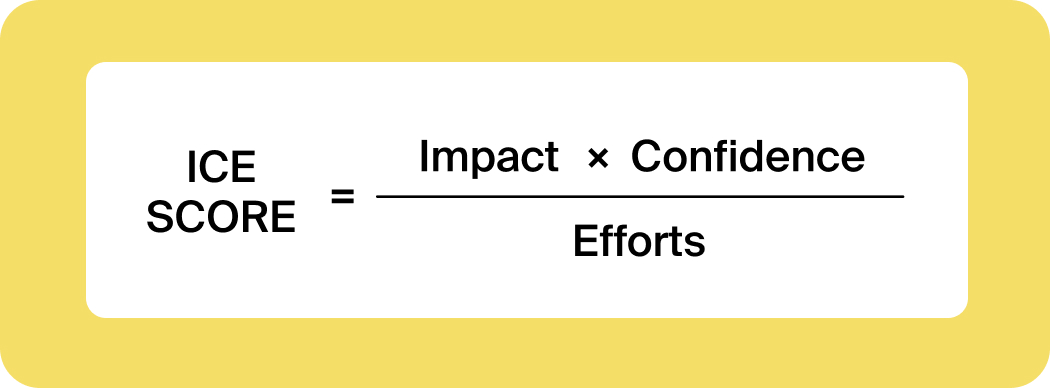

In [313]:
# Создаем новый столбец ICE
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence'])\
/hypothesis['Efforts'], 2)

In [314]:
# выводим на экран отсортированную таблицу hipothesis
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


`Согласно данным, полученным фреймворком ICE, наиболее приоритетными являются гипотезы с индексами: № 8,0,7,6,2`	

### Применим фреймворк RICE для приоритизации гипотез.

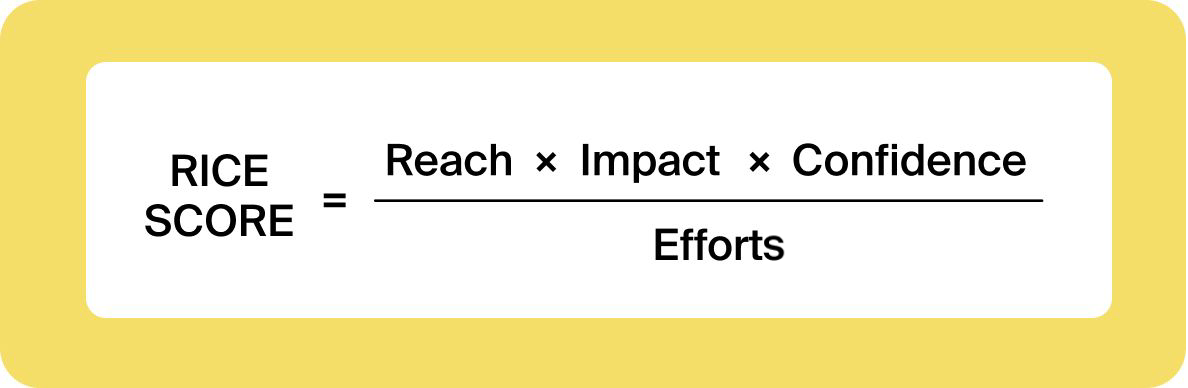

In [315]:
# Создаем новый столбец RICE
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * \
                      hypothesis['Confidence'])/hypothesis['Efforts'], 2)

In [316]:
# выводим на экран отсортированную таблицу hipothesis
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


`Согласно данным, полученным фреймворком RICE, наиболее приоритетными являются гипотезы с индексами: № 7,2,0,6,8, а именно:`

- `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
- `Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`
- `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`
- `Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию`
- `Запустить акцию, дающую скидку на товар в день рождения`

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

Приоритизация гипотез при применении RICE вместо ICE изменилась.

Метод RICE, это модицированный метод ICE.

Однако, данный метод помимо основных метрик также учитывает охват аудитории, т.е. другими словами, учитывает скольких пользователей затронет изменение, которое мы хотим внести.

т.е. помимо основных метрик мы также рассматриваем количество пользователей, которых затронет изменение и приоритизируем задачи с учетом данного фактора.\
(Чем больше пользователей - тем приоритетнее).

Учитывая тот фактор, что нам важно количетсво пользователей, которых затронет изменение решаем, что приоритет гипотез расставляем согласно методу RICE.

### ОБЩИЕ выводы по Шагу 2: 

1. Нами была проведена приоритизации гипотез методами ICE и RICE.
2. Согласно данным, полученным фреймворком ICE, наиболее приоритетными являлись гипотезы: № 8,0,7.
3. Согласно данным, полученным фреймворком RICE, наиболее приоритетными являются гипотезы: № 7,2,0
4. Нами была описана разница между двумя данными методами (ICE и RICE):\
Метод RICE - учитывает охват аудитории/количество пользваоателей, которых коснутся изменения.
5. Метод RICE - более приоритетный, и как следствие, наиболее приоритетными будут гипотезы с индексами № 7,2,0, а именно:
- **`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`**
- **`Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`**
- **`Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`**

## Шаг 3. Анализ А/В-теста.

### Построим график кумулятивной выручки по группам.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`: 

In [317]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 
Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups:`\
`orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]`.

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец `'group'` не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
`.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}).
Применим методы к каждой строке датафрейма: apply(axis=1)` и отсортируем результаты по столбцам `'date'` и `'group'`: 

In [318]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique',\
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Этот код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы `ordersAggregated.` 

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [319]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group']\
 == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

**Объединим обе таблицы в одну с понятными названиями столбцов:**

In [320]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [321]:
print('Минимальная дата', cumulativeData['date'].min())
print('Максимальная дата', cumulativeData['date'].max())

Минимальная дата 2019-08-01 00:00:00
Максимальная дата 2019-08-31 00:00:00


В оригинальном датафрейме минимальная и максимальные даты те же самые:
- Минимальная дата 1 августа.
- Максимальная дата 31 августа.

**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

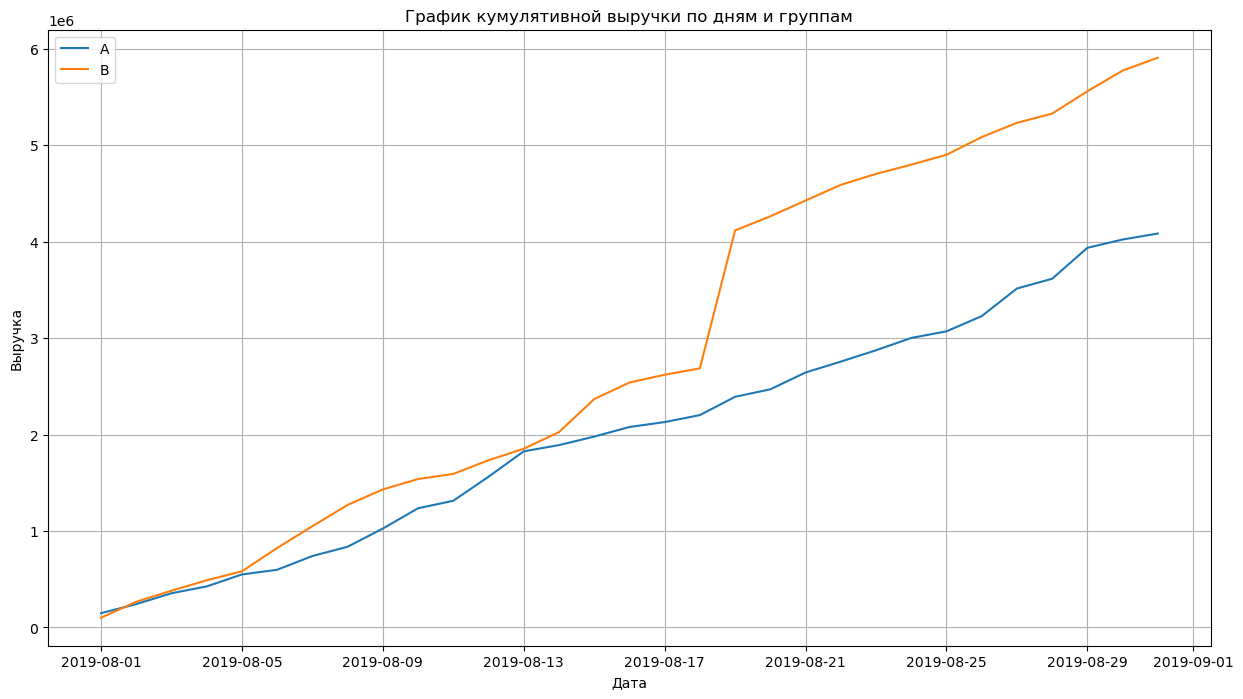

In [322]:
# датафрейм с кумулятивным количеством заказов 
# и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов
# и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А и B
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.title("График кумулятивной выручки по дням и группам")
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

Предлагаю сделать срез данных с 17 августа и посмотреть из-за чего возник такой выручки.

In [323]:
cumulativeRevenueB.query(' "2019-08-17" <= date ').head(8)

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437
43,2019-08-22,4589247,462
45,2019-08-23,4703216,477
47,2019-08-24,4798722,493


`Видим, что в группе 'B' с 17 августа ежедневно увеличивалось количество заказов примерно на (3-5%)`.

In [324]:
print('Медианное значение заказов по после 17 августа =',orders.query(' date >= "2019-08-17" ')['revenue'].median())
orders.query(' date >= "2019-08-17" ').sort_values(by='revenue', ascending=False).head(5)
print('Среднее значение заказов по после 17 августа =',orders.query(' date >= "2019-08-17" ')['revenue'].mean())
orders.query(' date >= "2019-08-17" ').sort_values(by='revenue', ascending=False).head(5)

Медианное значение заказов по после 17 августа = 3070.0
Среднее значение заказов по после 17 августа = 10007.486033519554


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
858,192721366,1316129916,2019-08-27,93940,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A


`Видим, что в группе 'B' 19 августа был ооочень большой заказ - № 425, с суммой покупки 1.294.500.`

`Учитывая что среднее медианное значение заказов около 10000, а медианное около 3000 - заказ суммой в миллион очень сильно искажает средние/медианные значения`.

`Именно данный заказ и сместил график кумулятивной выручки по дням.`


* **Краткие выводы:**

1. Выручка в обеих группах почти равномерно увеличивается в течение всего теста.\
Хороший знак.\
2. Однако график выручки группы `'B'` после `'2019-08-17'` резко растёт.\
Это сигнализирует о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
3. При проведении более тщательно анализа, мы обнаружили, что количество заказов после 17 августа и вправда увеличивалось ежедневно.
4. Но наибольшее искажение в график внёс заказ `№ 425.`\
Данный заказ был на сумму `1.294.500` что превышает медианные/средние выручки  почти в 400 раз.

### Cтроим график кумулятивного среднего чека по группам.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

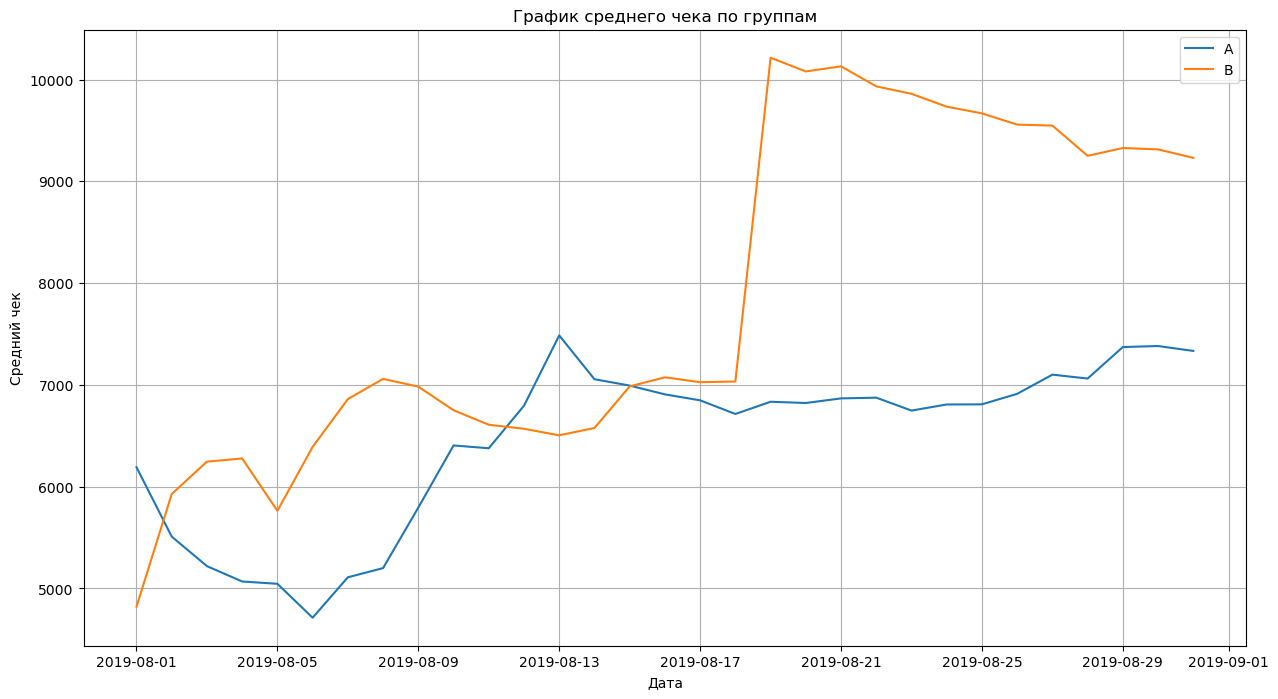

In [325]:
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.title("График среднего чека по группам")
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

* **Краткие выводы:**

1. Как видим, средний чек очень у группы `'A'` и группы `'B'` очень сильно отличается (+-7400/+-9200) - разница почти на 20%.\
2. Эта разница связана с сильным выбросом в данных в группе `'B'` с  19 августа.
3. В группе 'B' с 19 августа был совершен аномально большой заказ на сумму `1.294.500`.
4. Также количество заказов в группе `'B'` с 17 августа постепенно увеличивалось на 3-5%.
5. Для того, чтобы прийти к реальному среднему чеку и установиться на его уровне нам необходимо больше данных не искаженных выбросами.

### Cтроим график относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом **axhline()** (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

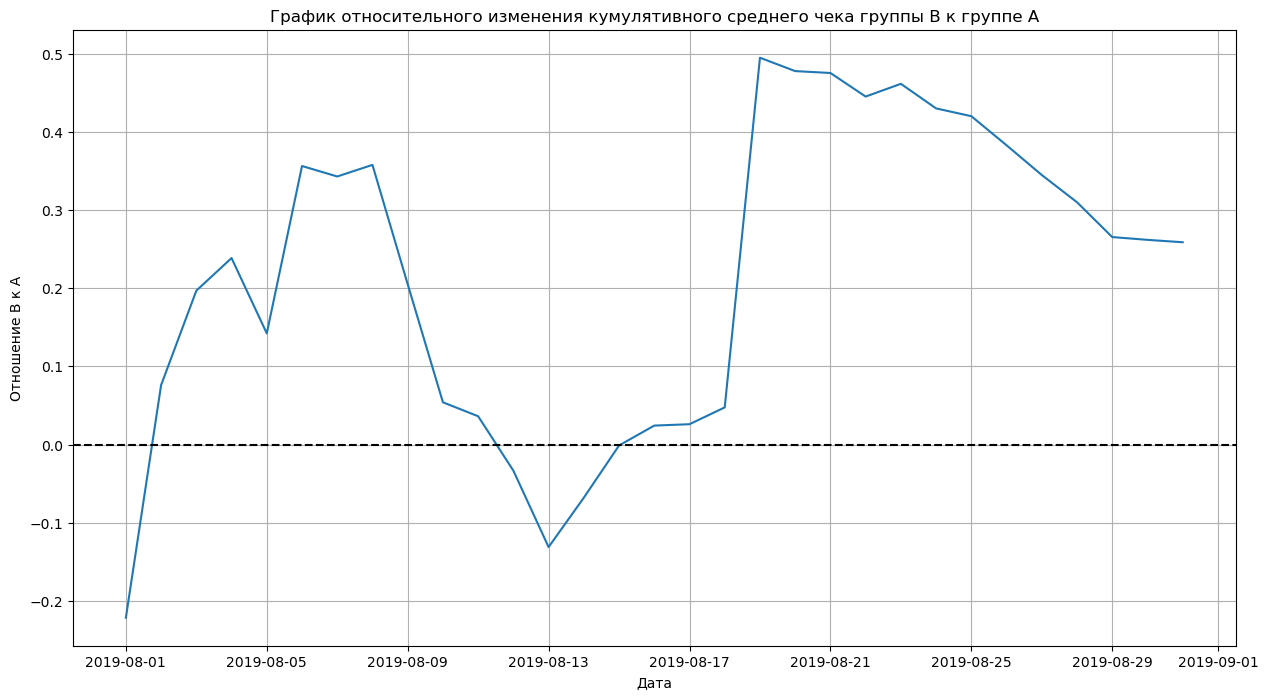

In [326]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Отношение B к А')
plt.axhline(y=0, color='black', linestyle='--');

* **Краткие выводы:**

1. В нескольких точках график различия между сегментами резко «скачет».\
Определенно где-то спрятались крупные заказы и выбросы!
2. Также замечаем, что благодаря этим выбросам - средний кумулятивный чек группы `'B'` практически на протяжении всего графика больше чем средний кумулятивный чек группы `'A'`.
3. После аномального заказа № 425, сместившего значение среднего чека на аномально высокий уровень, мы наблюдаем тенденцию снижения среднего чека у группы `'B'`, но никаких определенных выводов пока что сделать не можем.\
Необходимо больше данных, либо необходимо рассмотреть выборку исключив аномальное значение заказа № 425.

### Cтроим график кумулятивного среднего количества заказов на посетителя по группам

Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-04-01", '2019-04-23', 0, 0.015]:

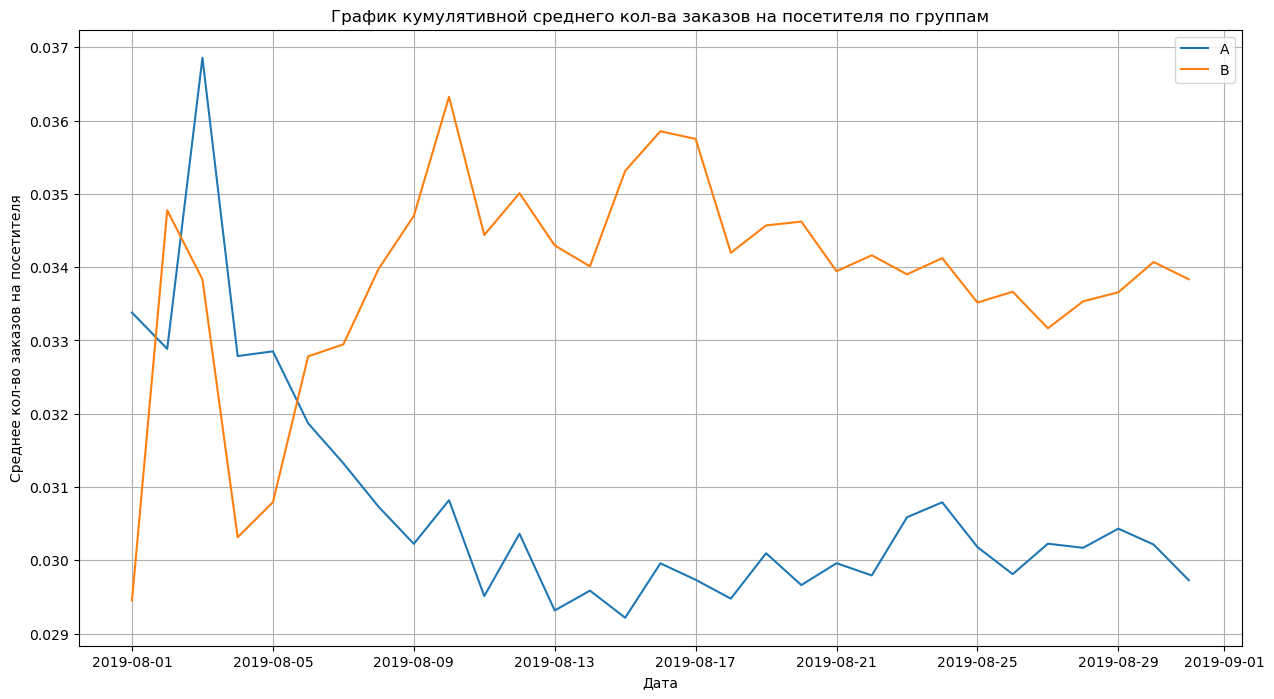

In [327]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("График кумулятивной среднего кол-ва заказов на посетителя по группам")
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.legend();



* **Краткие выводы:**

1. Видим, что графики немного отличаются.
2. Среднее количество заказов на посетителя у группы 'B' больше среднего количества заказов на посетителя у группы 'A' примерно на 10-15%. (0.030 против 0.034).
3. Среднее количество на посетителей у группы 'A' уменьшалось вплоть до 13 августа.\
Далее следует небольшой рост.
4. Среднее количество на посетителей у группы 'В' увеличивалось вплоть до 10 августа.\
Далее следует падение.

### Cтроим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

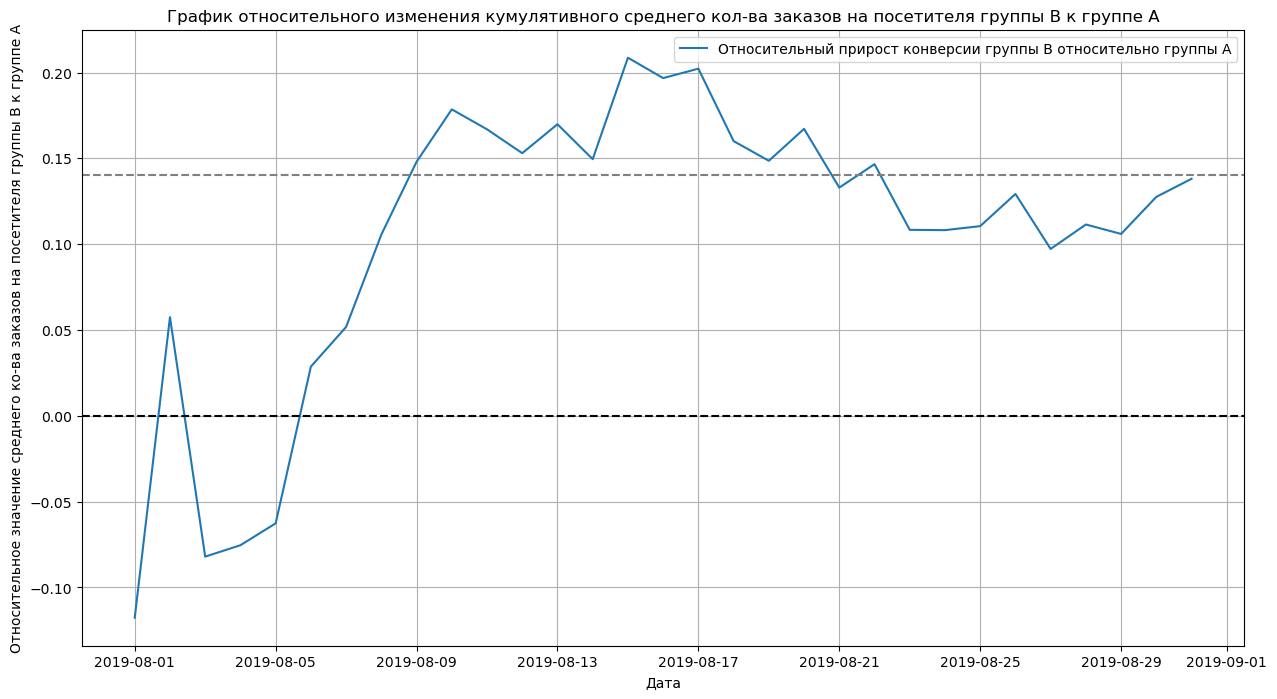

In [328]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,8))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title("График относительного изменения кумулятивного среднего кол-ва заказов на посетителя группы В к группе А")
plt.xlabel('Дата')
plt.ylabel('Относительное значение среднего ко-ва заказов на посетителя группы B к группе А')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--');


* **Краткие выводы:**

1. В общем и целом где-то до 6 августа группа `'B'` значительно проигрывала группе `'A'`, затем неудержимо вырвалась вперёд и была больше на протяжении всего оставшегося периода.
2. Конверсия среднего количества заказов у группы `'B'` превысила конверсию среднего количества заказов у группы `'A'` почти на 0.21 относительную единицу. и зафиксировалась в диапазоне (0.10 - 0.21).\
Другими словами, отн.изменение кумулятивного среднего кол-ва заказов у группы 'B' больше чем у группы 'A').
3. При рассмотрении с 13 августа, можем заметить тенденцию к уменьшению относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

### Cтроим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Для построения точечного графика нам потребуется сгруппировать данные по visitor_id и количеству заказов transactionId.\
Для построения точечного графика воспользуемся функцией `plt.scatter`.

In [329]:
print(orders.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B


In [330]:
user_order = orders.drop(['group', 'revenue', 'date'], axis=1)\
.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

user_order.columns = ['user_id','orders']

user_order.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [331]:
print('Медианное количество заказов у пользователя:',\
      user_order['orders'].median())

print('Среднее количество заказов у пользователя:',\
      round(user_order['orders'].mean(),2))

Медианное количество заказов у пользователя: 1.0
Среднее количество заказов у пользователя: 1.16


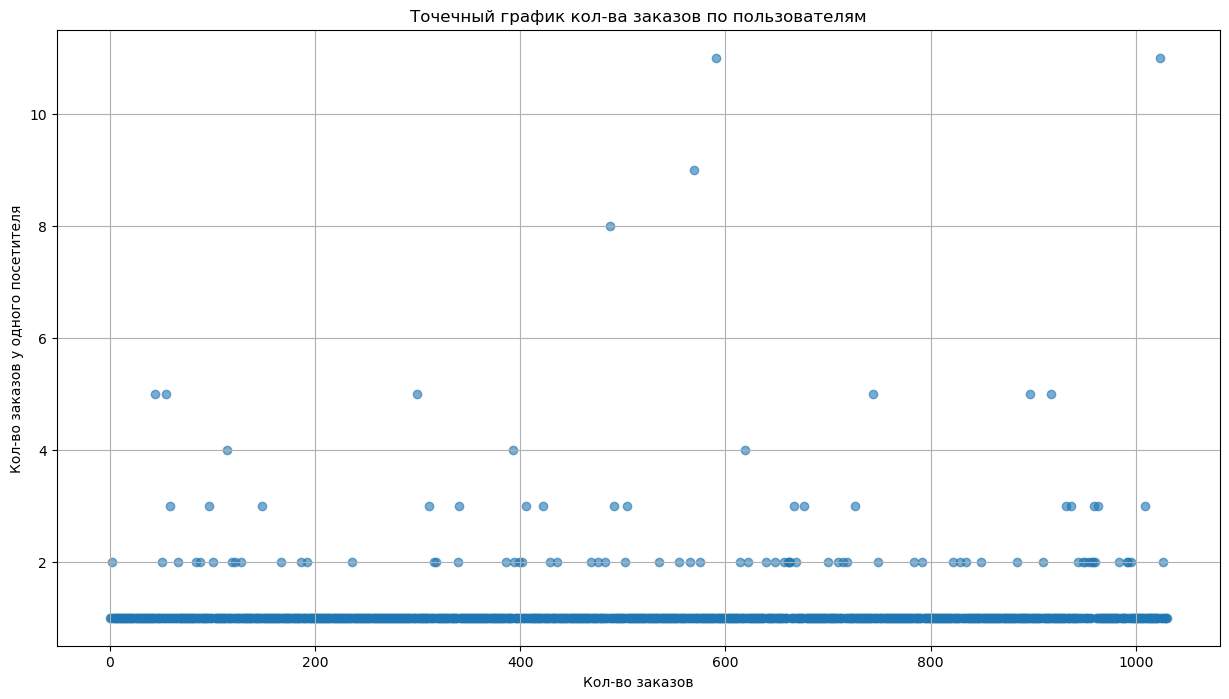

In [332]:
x_values = pd.Series(range(0,len(user_order)))

plt.figure(figsize=(15,8))
plt.grid()
plt.title("Точечный график кол-ва заказов по пользователям")
plt.xlabel('Кол-во заказов')
plt.ylabel('Кол-во заказов у одного посетителя')
plt.scatter(x_values, user_order['orders'], alpha=0.6);

* **Краткие выводы:**

1. Как видим на графике - есть пользователи, которые совершали много заказов.
2. Наибольшее количество заказов у пользователей со следующими ID: `4256040402`, `2458001652`. (Данные пользователи совершили по `11 заказов`).
3. Но также видим, что пользователей, совершивших больше 2х заказов не так много.
4. Медианное кол-во заказов у пользователей - 1.\
Среднее кол-во заказов у пользователей - 1.16.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

Перцентиль (от лат. per centum + ile, «на сотню, процент»).\
Перцентиль — значение, больше которого определённая доля элементов выборки.

Для подсчёта перцентилей применяют метод percentile() библиотеки Numpy: 

In [333]:
print(np.percentile(user_order['orders'], [95, 99])) 

[2. 4.]


* **Краткие выводы:**

Согласно полученным данным:
- Не более чем у 5% пользователей более 2х заказов.
- Не более чем у 1% пользователей более 4х заказов.
- Исходя из предудыщего опыта, определим границу, для определения аномальных пользователей, равной 4м заказам.
- Пользователей, совершивших более 4х заказов (менее 1%) - будем считать аномальными.

### Построим точечный график стоимостей заказов. 

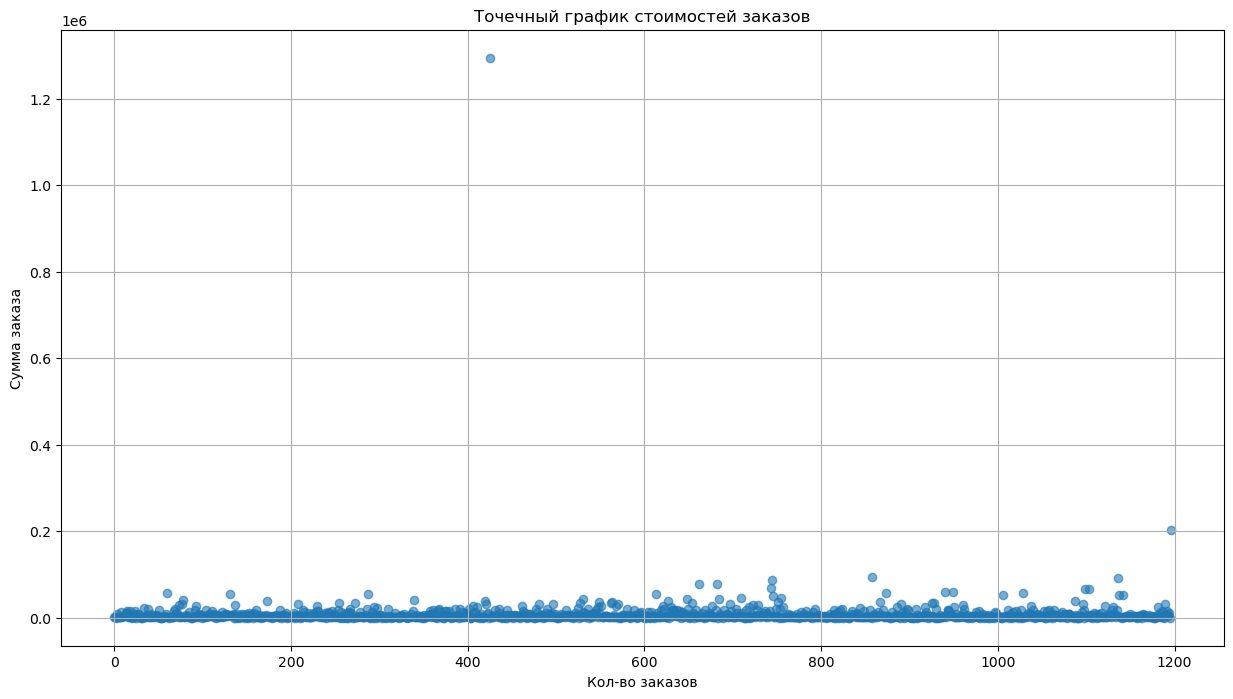

In [334]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,8))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Сумма заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.6);

Для того, чтобы получше разглядеть график, воспользуемся ограничем по оси 'y' (ylim установим до 70 тысяч). При желании, можно уменьшить или увеличить лимиты. 

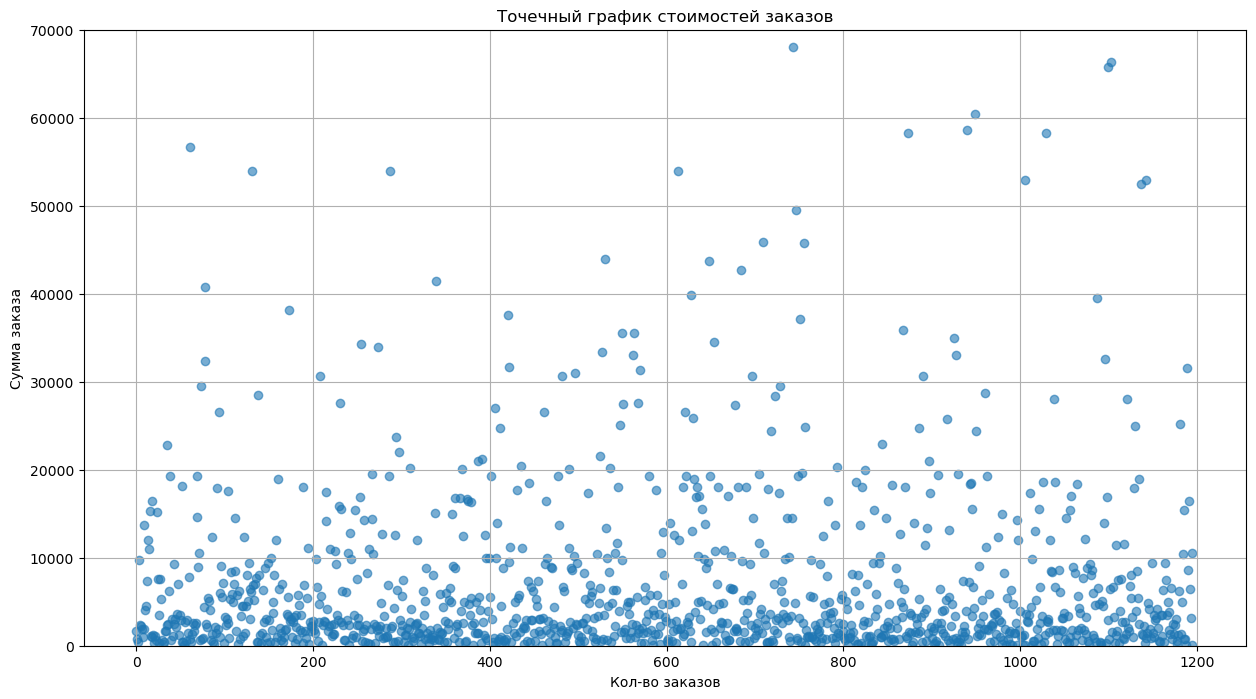

In [335]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,8))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Сумма заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.6)
plt.ylim(0, 70000);

* **Краткие выводы:**

1. Как видим, аномальный заказ на сумму более 1млн. у нас был только 1. 
(его мы определили ранее, заказ № 425).
2. Но согласно графику видим, что присутствует ещё один аномально большой заказ примерно на 200 тысяч.
3. Основная стоимость заказов, согласно графику, не превышает планки в 30.000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [336]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


* **Краткие выводы:**

Согласно полученным данным:
- Не более чем у 5% пользователей стоимость заказов превышает 28.000.
- Не более чем у 1% пользователей стоимость заказов превышает 58.233,2.
- Исходя из предудыщего опыта, определим границу, для определения аномальных заказов в 58.233,2.
- Пользователей, совершивших заказы стоимостью более 58.233,2 (таких менее 1%) - будем считать аномальными.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы.
- `Нулевая:` различий в среднем количестве заказов между группами нет.
- `Альтернативная:` различия в среднем кол-ве заказов между группами есть.

Прежде, чем считать статистическую значимость различий в среднем количестве заказов на посетителя между группами, подготовим данные.

Соберем все необходимые нам данные в одну таблицу.

In [337]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [338]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


In [339]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [340]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная `sampleA` должна состоять из двух частей:

1. Список с количеством заказов для каждого из пользователей: `ordersByUsersA['orders']`.
2. Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])`. Создадим объект pd.Series нужной длины:

Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): `pd.concat([...], axis=0)`. То же делаем для `sampleB` и получаем:

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой.
Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов `sampleA` — это количество пользователей, сумма всех элементов — количество заказов.\
Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке `sampleA` методом mean(). Аналогично найдём среднее группы B: `SampleB.mean()`.

Выведем относительный прирост среднего числа заказов группы B: `среднее число заказов группы B / среднее число заказов группы A - 1`.\
Округлим до трёх знаков после запятой.

In [341]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


In [342]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

* **Краткие выводы по "сырым данным":**

1. По «сырым» данным, `различия` в среднем количестве заказов между группами 'A' и 'B', `есть`.

2. Первое число — `p-value = 0.017` меньше 0.05 (уровень статистической значимости).\
Значит, `нулевую гипотезу` о том, что статистически значимых различий в среднем количестве заказов между группами нет, `отвергаем`.
3. Принимаем альтернативную гипотезу:\
Предполагаем, что различия в среднем кол-ве заказов между группами есть.

4. Относительный выигрыш группы 'B' равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

- `Нулевая гипотеза:` различий в среднем чеке между группами нет.
- `Альтернативная гипотеза:` различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов. 

Найдём относительные различия в среднем чеке между группами:

In [343]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


* **Краткие выводы по "сырым данным":**

1. P-value значительно больше 0.05.
2. Значит, причин отвергать нулевую гипотезу - нет.
(т.е. считаем, что различий в среднем чеке между группами нет).
3. При этом замечаем, что средний чек группы B значительно выше среднего чека группы A. (Почти на 26% больше).
4. При этом мы помним, что в группе 'B' 19 августа был ооочень большой заказ - № 425, с суммой покупки 1.294.500, а также помним, что у пользователей из группы 'B' больше заказов, чем у пользователей из группы 'A'.
5. Но что будет, когда мы уберем аномальные значения ? Посмотрим...
6. А пока, можем сделать предположение, что пользователи из группы 'A' совершают меньше заказов, но, возможно, на большие суммы.(если мы не будем учитывать аномальные значения). Это предположение мы проверим чуть ниже.

### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Напоминаем, что найденные в прошлых разделах:

- 95-й и 99-й перцентили средней стоимости заказов равны `28.000` и `58233.2`
- 95-й и 99-й перцентили количества заказов на одного пользователя равны `2` и `4` заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от `4` заказов или совершил заказ дороже `58233.2 рублей`.\
Так мы уберём до 1% пользователей с наибольшим числом заказов и до 1% пользователей с дорогими заказами.\
(Суммарно - не более 5%)

Сделаем срезы пользователей с числом заказов больше `4 — usersWithManyOrders` и пользователей, совершивших заказы дороже `58233.2 — usersWithExpensiveOrders`.

Объединим их в таблице abnormalUsers. 

Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [344]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(user_order['orders'],99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(user_order['orders'],99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


`Всего 15 аномальных пользователей.`

Узнаем, как их действия повлияли на результаты теста.\
Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по "очищенным данным".(без аномальных значений).\
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [345]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [346]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.014
Относительный показатель 'B' и 'A' = 0.153


* **Краткие выводы по "очищенным данным":**

1. Напоминаю, значения по "сырым" данным было: `0.017`, `0.138`.

2. Как видим, результаты по среднему количеству заказов практически не изменились.\
Несмотря на то, что мы избавились от 15 аномальных пользователей.

3. По «очищенным» данным, различия в среднем количестве заказов между группами 'A' и 'B', также есть.

4. Первое число — p-value = 0.014 меньше 0.05 (уровень статистической значимости).\
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет - `отвергаем`.

5. `Принимаем альтернативную гипотезу:`
Предполагаем, что различия в среднем кол-ве заказов между группами есть.

6. Относительный выигрыш группы 'B' равен 15.3%.

7. т.е. очистка данных (удаление аномальных значений) только ещё больше подтвердило наши догадки о том, что вероятно присутствуют различия в среднем количестве заказов между группами:
Пользователи из группы 'B' совершают на 15.3% больше заказов чем пользовали из группы 'A'.

8. Интересно, произошло ли что-нибудь с результатами по среднему чеку?\
Напоминаю, согласно неочищенным данным мы делали предположение, что пользователи из группы 'A' совершают меньше заказов, но на большие суммы.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [347]:
print("alpha =",0.05)
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.851
Относительный показатель 'B' и 'A' = -0.006


* **Краткие выводы по "очищенным данным":**
    
1. Напоминаю, значения по "сырым" данным было: `0.729`, `0.259`.
2. Феноменально!!!
P-value увеличился, но и разница между сегментами сократилась с `25.9%` до `0.6%`.
3. P-value значительно больше 0.05.
4. Значит, причин отвергать нулевую гипотезу - нет.\
(т.е. `считаем, что различий в среднем чеке между группами 'A' и 'B' - практически нет.`
5. Аномальные значения, которые мы убрали, по большей части увеличивали стоимость среднего чека у пользователей из группы 'B'.
6. После того, как мы убрали данные аномальных пользователей - разница в средних чеках между группами сошла на нет и даже показала отрицательную динамику.\
(т.е. средние чеки у пользователей из группы 'A' немного превысили значения средних чеков пользователей группы'B')
9. Наши предположения подтвердились только частично:\
Пользователи из группы 'A' совершают меньше заказов.\
При этом средние чеки между группами 'A' и 'B' практически одинаковые. (разница около ~0.6% < 1%).

### Дополнительное построение кумулятивных графиков для "очищенных" данных, в случае, если бы мы убрали все заказы стоимостью более 58.233,2.

`Попробуем посмотреть как изменились бы кумулятивные графики, если бы мы использовали только срез данных с затратами менее 58.233,2.`

In [348]:
new_orders = orders.query("revenue <=58233.2")

In [349]:
new_datesGroups = new_orders[['date','group']].drop_duplicates() 

In [350]:
new_ordersAggregated = new_datesGroups.apply(lambda x: new_orders[np.logical_and(new_orders['date'] <= x['date'], new_orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique',\
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [351]:
new_visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group']\
 == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [352]:
new_cumulativeData = new_ordersAggregated.merge(new_visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
new_cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(new_cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


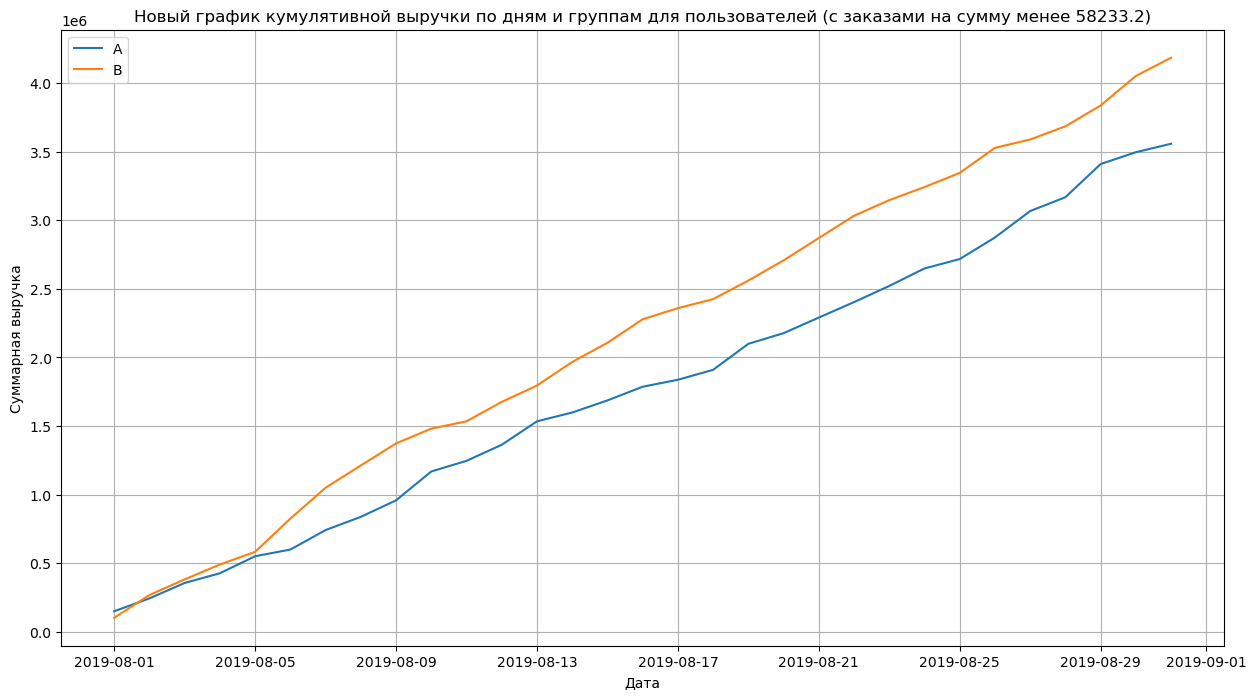

In [353]:
new_cumulativeRevenueA = new_cumulativeData[new_cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов
# и кумулятивной выручкой по дням в группе B
new_cumulativeRevenueB = new_cumulativeData[new_cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А и B
plt.figure(figsize=(15,8))
plt.plot(new_cumulativeRevenueA['date'], new_cumulativeRevenueA['revenue'], label='A')
plt.plot(new_cumulativeRevenueB['date'], new_cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.title("Новый график кумулятивной выручки по дням и группам для пользователей (с заказами на сумму менее 58233.2)")
plt.xlabel('Дата')
plt.ylabel('Суммарная выручка')
plt.legend();

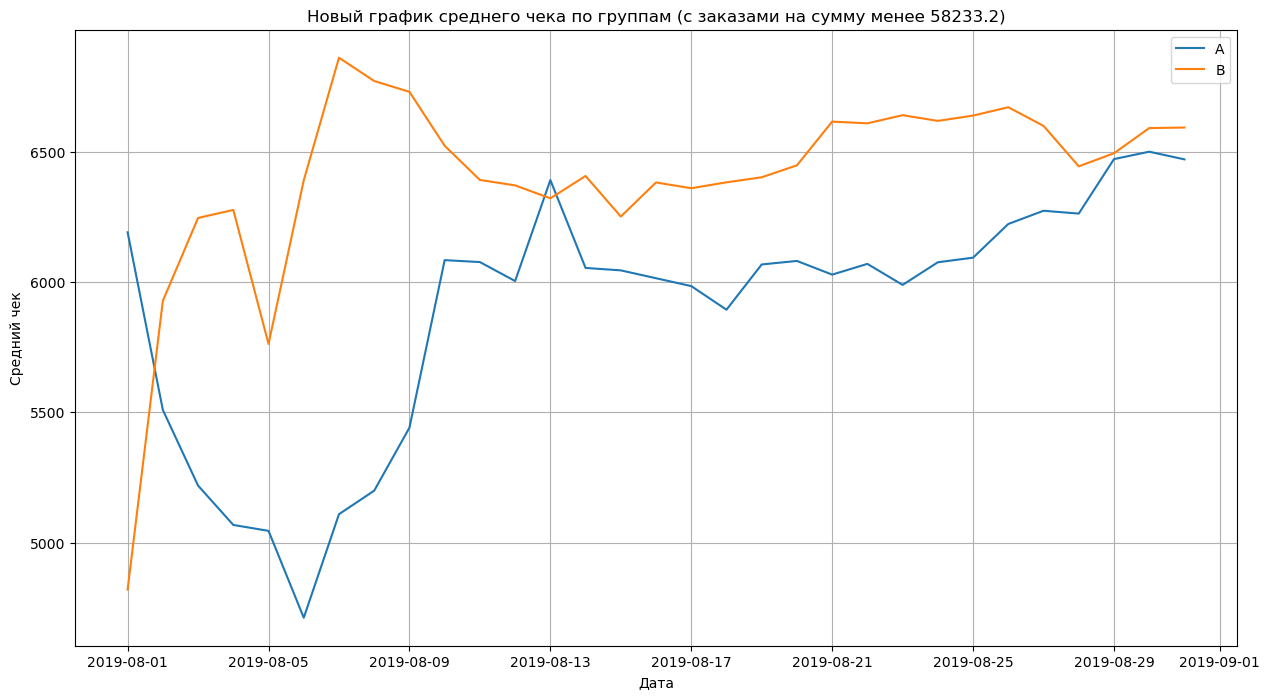

In [354]:
plt.figure(figsize=(15,8))
plt.plot(new_cumulativeRevenueA['date'], new_cumulativeRevenueA['revenue']/new_cumulativeRevenueA['orders'], label='A')
plt.plot(new_cumulativeRevenueB['date'], new_cumulativeRevenueB['revenue']/new_cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.title("Новый график среднего чека по группам (с заказами на сумму менее 58233.2)")
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

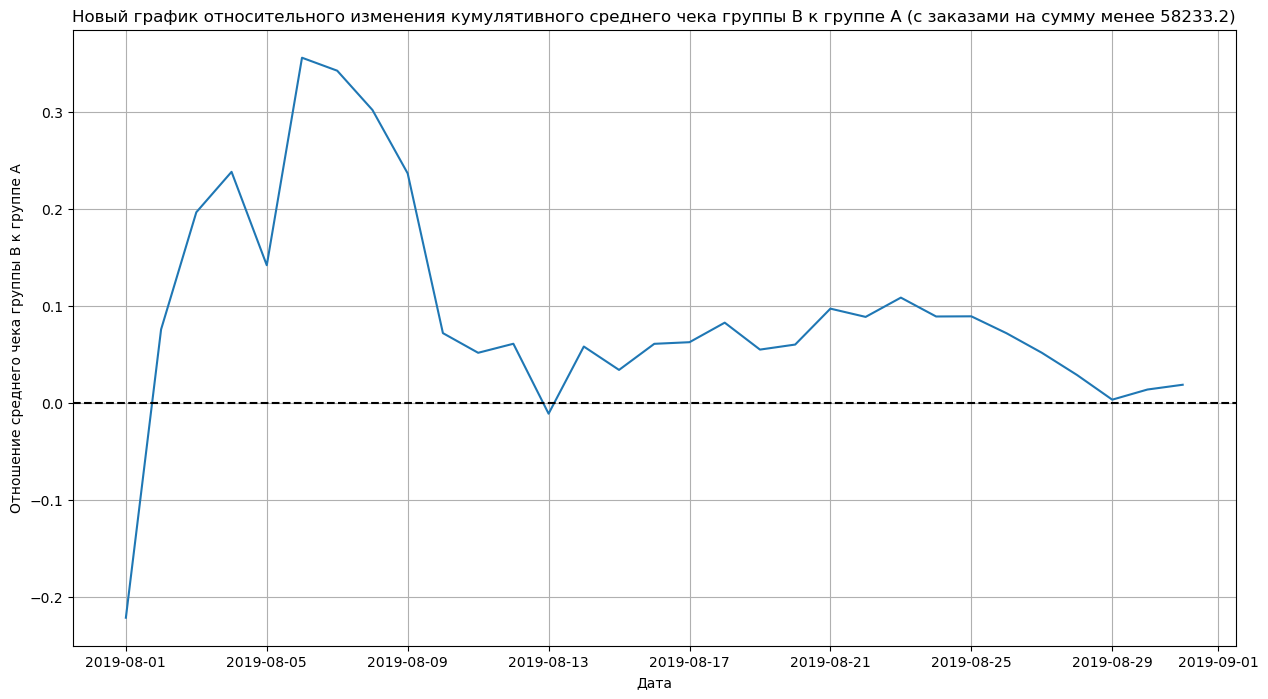

In [355]:
# собираем данные в одном датафрейме
new_mergedCumulativeRevenue = new_cumulativeRevenueA.merge(new_cumulativeRevenueB, left_on='date',\
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(new_mergedCumulativeRevenue['date'], (new_mergedCumulativeRevenue['revenueB']/new_mergedCumulativeRevenue['ordersB'])\
         /(new_mergedCumulativeRevenue['revenueA']/new_mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.title("Новый график относительного изменения кумулятивного среднего чека группы B к группе A (с заказами на сумму менее 58233.2)")
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--');

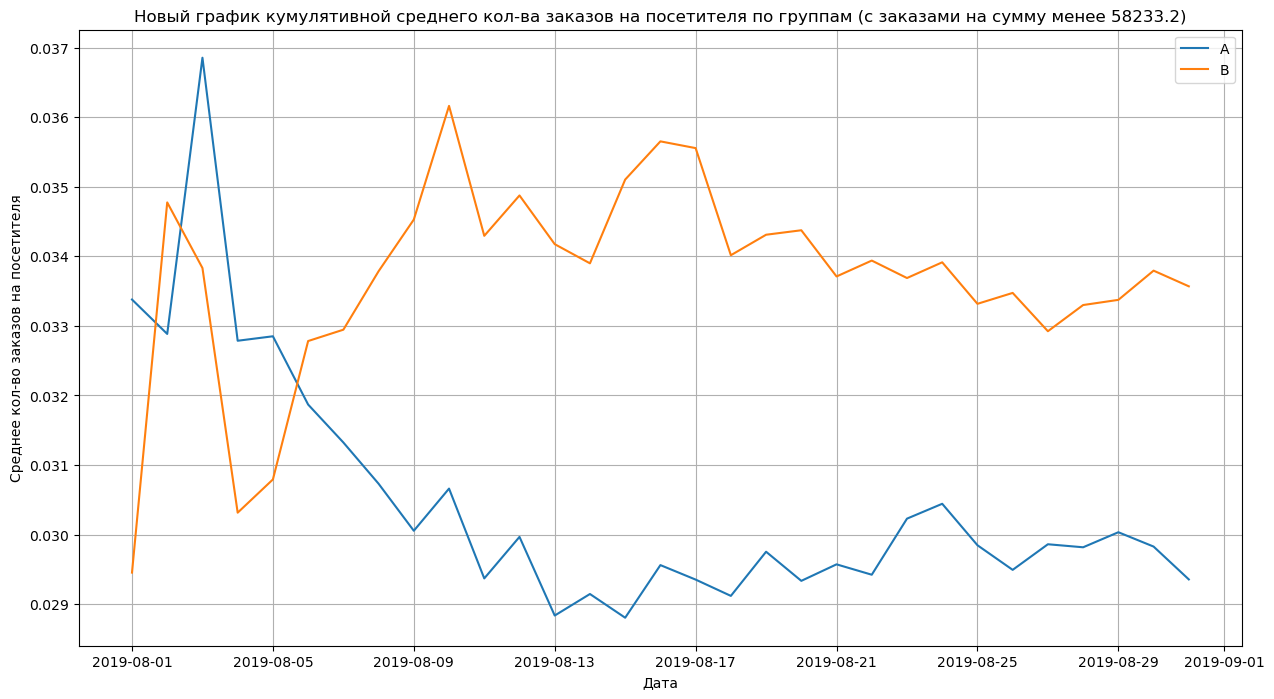

In [356]:
# считаем кумулятивную конверсию
new_cumulativeData['conversion'] = new_cumulativeData['orders']/new_cumulativeData['visitors']

# отделяем данные по группе A
new_cumulativeDataA = new_cumulativeData[new_cumulativeData['group']=='A']

# отделяем данные по группе B
new_cumulativeDataB = new_cumulativeData[new_cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(new_cumulativeDataA['date'], new_cumulativeDataA['conversion'], label='A')
plt.plot(new_cumulativeDataB['date'], new_cumulativeDataB['conversion'], label='B')
plt.title("Новый график кумулятивной среднего кол-ва заказов на посетителя по группам (с заказами на сумму менее 58233.2)")
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.legend();


* **Краткие выводы по новым кумулятивным графикам:**

1. Как видим, после внесенных изменений (убрали все заказы с суммой более 58.233,2), кумулятивные графики тоже изменились.
2. На новом графике кумулятивной выручки по дням и группам для пользователей с заказами на сумму менее 58.233,2 четко видим, что выручка у обеих групп непрерывно плавно растёт, однако явно виден лидер.\
У пользователей из группы 'B' общая выручка растёт больше, чем у пользователей из группы 'A'.
3. На новом графике среднего чека по группам с заказами на сумму менее 58.233,2, видим, что средний чек у обеих групп примерно на одном уровне (около 6.500).\
В общем и целом - средний чек у обоих групп имеет тенденцию к росту.
4. На новом графике относительного изменения кумулятивного среднего чека группы B к группе A (с заказами на сумму менее 58.233,2), замечаем, что отношение стремится к нулю.\
другими словами - относительная разница между средними кумулятивными чеками практически нулевая.
Средние чеки подобны, разница между ними незначительна.
5. Новый график кумулятивной среднего кол-ва заказов на посетителя по группам (с заказами на сумму менее 58.233,2) остался примерно таким же, как до "очищения" данных.\
т.е. другими словами, по прежнему видно, что пользователи из группы 'B' в среднем совершают больше заказов, чем пользователи из группы 'A'.

### Примем решение по результатам теста и объясним его.

Итак.\
Пришла пора принимать решение по результатам теста.

Мы имеем следующие факты:

1. Согласно исследованию, и по "сырым" данным, и по "очищенным" данным:
- `Различия` в среднем количестве заказов между группами 'A' и 'B' - `ЕСТЬ!`
- `Пользователи из группы 'B' совершают больше заказов чем пользовали из группы 'A'.`

2. Согласно исследованию, и по "сырым" данным, и по "очищенным" данным:
- `Различий` в среднем чеке между группами 'A' и 'B' - `НЕТ!`.
-
- При этом по "сырым" данным: средний чек группы 'B' значительно выше среднего чека группы 'A'.\
(Почти на 26% больше).
- А по "очищенным" данным - различий в среднем чеке между группами 'A' и 'B' - практически нет.\
(средний чек группы 'A' немного выше среднего чека группы  'B'. На 0.6%).
- Так получилось засчет того, что высокие (аномальные) значения у пользователей из группы 'B' очень сильно меняли средний чек.\
(пример - заказ №425).

3. Согласно графику относительного изменения кумулятивного среднего чека группы B к группе A.:
- Обнаружили, что аномальный заказ № 425, сместил значение среднего чека на аномально высокий уровень у группы 'B'.
- После очищения графиков, видим что `значения средних чеков примерно одинаковые`.
- Замечаем, что `значения средних чеков имеют тенденцию к увеличению`.

4. Согласно графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:
- `Относительное изменение кумулятивного среднего кол-ва заказов у группы 'B' больше чем у группы 'A'`.
т.е. у группы 'B' прирост кол-ва заказов был больше, чем у группы 'A'.
(данные подтвердились и после проверки гипотез (после очищения данных).\
`пользователи группы 'B' в среднем совершали больше заказов, чем пользователи группы 'A'`.

5. Согласно графику кумулятивной выручки по дням и группам для пользователей и до и после очищения данных наблюдаем тенденцию к увеличению выручки.

На основании всего выше описанного принимаем решение:

1. `Остановить тест`
2. `Признать его успешным`
3. `Перейти к проверке следующей гипотезы`

- ***Победа в данном тесте присуждается группе 'B' !!!!!!!!!***

**При примерно одинаковом среднем чеке у обоих групп, пользователи из группы `'B'` в среднем совершали больше заказов, чем пользователи из группы `'A'`**.

Эти данные были подтверждены и статистическими данными и графиками.

## Окончательные ВЫВОДЫ:

В ходе данного исследования был рассмотрен список гипотез для увеличения выручки.
В данном проекте мы попробовали приоритизировать гипотезы, запускали A/B-тест и анализировали полученные результаты.
На основании полученных данных я предоставляю свои рекомендации отделу маркетинга.

Итак, начнем:

После небольшой преобработки данных мы приоритизировали гипотезы.

Вот краткие выводы по приоритизиации гипотез:

1. Нами была проведена приоритизации гипотез методами ICE и RICE.
2. Согласно данным, полученным фреймворком ICE, наиболее приоритетными являлись гипотезы с индексами: № 8,0,7.
3. Согласно данным, полученным фреймворком RICE, наиболее приоритетными являются гипотезы с индексами: № 7,2,0
4. Нами была описана разница между двумя данными методами (ICE и RICE):
5. Метод RICE - учитывает охват аудитории/количество пользователей, которых коснутся изменения.
6. Метод RICE - более приоритетный, и как следствие, наиболее приоритетными будут гипотезы с индексами № 7,2,0, а именно:
- **`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`**
- **`Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`**
- **`Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`**

Затем мы перешли к анализу A/B тестов.\
Строили кумулятивные графики, рассчитывали p-value.
Выявляли есть ли разница между средними чеками и средним количеством заказов у подгрупп `'A'`и `'B'`.

Краткие выводы:

1. Согласно исследованию, и по "сырым" данным, и по "очищенным" данным:
- `Различия` в среднем количестве заказов между группами 'A' и 'B' - `ЕСТЬ!`
- `Пользователи из группы 'B' совершают больше заказов чем пользовали из группы 'A'.`

2. Согласно исследованию, и по "сырым" данным, и по "очищенным" данным:
- `Различий` в среднем чеке между группами 'A' и 'B' - `НЕТ!`.

- При этом по "сырым" данным: средний чек группы 'B' значительно выше среднего чека группы 'A'.\
(Почти на 26% больше).
- А по "очищенным" данным - различий в среднем чеке между группами 'A' и 'B' - практически нет.\
(средний чек группы 'A' немного выше среднего чека группы  'B'. На 0.6%).
- Так получилось засчет того, что высокие (аномальные) значения у пользователей из группы 'B' очень сильно меняли средний чек.\
(пример - заказ №425).

3. Согласно графику относительного изменения кумулятивного среднего чека группы B к группе A.:
- Обнаружили, что аномальный заказ № 425, сместил значение среднего чека на аномально высокий уровень у группы 'B'.
- После очищения графиков, видим что `значения средних чеков примерно одинаковые`.
- Замечаем, что `значения средних чеков имеют тенденцию к увеличению`.

4. Согласно графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:
- `Относительное изменение кумулятивного среднего кол-ва заказов у группы 'B' больше чем у группы 'A'`.
т.е. у группы 'B' прирост среднего кол-ва заказов был больше, чем у группы 'A'.
(данные подтвердились и после проверки гипотез (после очищения данных).\
`пользователи группы 'B' в среднем совершали больше заказов, чем пользователи группы 'A'`.

### Рекомендации для отдела маркетинга:



1. Рекомендую сфоркусировать своё внимание на пользвателях из группы `'B'`.

При примерно одинаковом среднем чеке у обоих групп, пользователи из группы `'B'` в среднем совершали на ~14.5% больше заказов, чем пользователи из группы `'A'`.

2. Перейти к рассмотрению следующих гипотез.\
Наиболее приоритетными будут гипотезы с индексами № 7,2,0.6,8, а именно:
- `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
- `Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`
- `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`
- `Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию`
- `Запустить акцию, дающую скидку на товар в день рождения`


`С Уважением,`\
`Степанян Ваган Сергеевич :)`